In [7]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [23]:
columns=['ds','y']
df=pd.read_table('../lstm/lstmData/lstmPrac11.csv', sep=',',header=None,names=columns )
sales=list(df['y'])
sales
df['y']=np.log(df['y'])

In [31]:
forecastDay=4

In [32]:
rawArrayDatas=["2010-02-05",
      "2010-02-12",
      "2010-02-19",
      "2010-02-26",
      "2010-03-05",
      "2010-03-12",
      "2010-03-19",
      "2010-03-26",
      "2010-04-02",
      "2010-04-09",
      "2010-04-16",
      "2010-04-23",
      "2010-04-30",
      "2010-05-07",
      "2010-05-14",
      "2010-05-21",
      "2010-05-28",
      "2010-06-04",
      "2010-06-11",
      "2010-06-18",
      "2010-06-25",
      "2010-07-02",
      "2010-07-09",
      "2010-07-16",
      "2010-07-23",
      "2010-07-30",
      "2010-08-06",
      "2010-08-13",
      "2010-08-20",
      "2010-08-27",
      "2010-09-03",
      "2010-09-10",
      "2010-09-17",
      "2010-09-24",
      "2010-10-01",
      "2010-10-08",
      "2010-10-15",
      "2010-10-22",
      "2010-10-29",
      "2010-11-05",
      "2010-11-12",
      "2010-11-19",
      "2010-11-26",
      "2010-12-03",
      "2010-12-10",
      "2010-12-17",
      "2010-12-24",
      "2010-12-31",
      "2011-01-07",
      "2011-01-14",
      "2011-01-21",
      "2011-01-28",
      "2011-02-04",
      "2011-02-11",
      "2011-02-18",
      "2011-02-25",
      "2011-03-04",
      "2011-03-11",
      "2011-03-18",
      "2011-03-25",
      "2011-04-01",
      "2011-04-08",
      "2011-04-15",
      "2011-04-22",
      "2011-04-29",
      "2011-05-06",
      "2011-05-13",
      "2011-05-20",
      "2011-05-27",
      "2011-06-03",
      "2011-06-10",
      "2011-06-17",
      "2011-06-24",
      "2011-07-01",
      "2011-07-08",
      "2011-07-15",
      "2011-07-22",
      "2011-07-29",
      "2011-08-05",
      "2011-08-12",
      "2011-08-19",
      "2011-08-26",
      "2011-09-02",
      "2011-09-09",
      "2011-09-16",
      "2011-09-23",
      "2011-09-30",
      "2011-10-07",
      "2011-10-14",
      "2011-10-21",
      "2011-10-28",
      "2011-11-04",
      "2011-11-11",
      "2011-11-18",
      "2011-11-25",
      "2011-12-02",
      "2011-12-09",
      "2011-12-16",
      "2011-12-23",
      "2011-12-30",
      "2012-01-06"],[24924.5,
      46039.489999999998,
      41595.550000000003,
      19403.540000000001,
      21827.900000000001,
      21043.389999999999,
      22136.639999999999,
      26229.209999999999,
      57258.43,
      42960.910000000003,
      17596.959999999999,
      16145.35,
      16555.110000000001,
      17413.939999999999,
      18926.740000000002,
      14773.040000000001,
      15580.43,
      17558.09,
      16637.619999999999,
      16216.27,
      16328.719999999999,
      16333.139999999999,
      17688.759999999998,
      17150.84,
      15360.450000000001,
      15381.82,
      17508.41,
      15536.4,
      15740.129999999999,
      15793.870000000001,
      16241.780000000001,
      18194.740000000002,
      19354.23,
      18122.52,
      20094.189999999999,
      23388.029999999999,
      26978.34,
      25543.040000000001,
      38640.93,
      34238.879999999997,
      19549.389999999999,
      19552.84,
      18820.290000000001,
      22517.560000000001,
      31497.650000000001,
      44912.860000000001,
      55931.230000000003,
      19124.580000000002,
      15984.24,
      17359.700000000001,
      17341.470000000001,
      18461.18,
      21665.759999999998,
      37887.169999999998,
      46845.870000000003,
      19363.830000000002,
      20327.610000000001,
      21280.400000000001,
      20334.23,
      20881.099999999999,
      20398.09,
      23873.790000000001,
      28762.369999999999,
      50510.309999999998,
      41512.389999999999,
      20138.189999999999,
      17235.150000000001,
      15136.780000000001,
      15741.6,
      16434.150000000001,
      15883.52,
      14978.09,
      15682.809999999999,
      15363.5,
      16148.870000000001,
      15654.85,
      15766.6,
      15922.41,
      15295.549999999999,
      14539.790000000001,
      14689.24,
      14537.370000000001,
      15277.27,
      17746.68,
      18535.48,
      17859.299999999999,
      18337.68,
      20797.580000000002,
      23077.549999999999,
      23351.799999999999,
      31579.900000000001,
      39886.059999999998,
      18689.540000000001,
      19050.66,
      20911.25,
      25293.490000000002,
      33305.919999999998,
      0,0,0,0]

In [62]:
len(rawArrayDatas[1])

101

In [63]:

dayOrWeekOrMonth='week'
    # options:
    # 'day', 'week', 'month'

feature = 'DayOfWeek_WeekNumber_Month_Season'
    # options:
    # dayOrWeekOrMonth='day': 'DayOfWeek_WeekNumber_Month_Season','DayOfWeek01_WeekNumber_Month_Season'//
    # dayOrWeekOrMonth='week': 'WeekNumber_Month_Season_Year'


mockForcastDay=2*forecastDay

    ##Make txsForRealForecastLstm   [:]
ds = rawArrayDatas[0]
y = list(rawArrayDatas[1])
sales = list(zip(ds, y))
txsForRealForecastLstm =pd.DataFrame(data=sales, columns=['date', 'sales'])
   

    ##Make txsForMockForecastLstm [:-forecastDay]
ds = rawArrayDatas[0][:-forecastDay]
y= list(rawArrayDatas[1][:-forecastDay] )
sales = list(zip(ds, y))
txsForMockForecastLstm =pd.DataFrame(data=sales, columns=['date', 'sales'])
   
    ##Make txsForRealForecastBayesian [:-forecastDay] & np.log
ds = rawArrayDatas[0][:-forecastDay]
    # TODO bayseian에 대해서는 input값이 0인 상황처리 필요
y = list(np.log(rawArrayDatas[1][:-forecastDay]))
sales = list(zip(ds, y))
txsForRealForecastBayesian = pd.DataFrame(data=sales, columns=['ds', 'y'])
    
    ##Make txsForMockForecastBayseian   [:-3*forecastDay] & np.log
ds = rawArrayDatas[0][:-3*forecastDay]
    #TODO bayseian에 대해서는 input값이 0인 상황처리 필요
y= list(np.log(rawArrayDatas[1][:-3*forecastDay]))
sales = list(zip(ds, y))
txsForMockForecastBayseian =pd.DataFrame(data=sales, columns=['ds', 'y'])
    
    #testY for algorithm compare has size of 2*forecastDay:  rawArrayDatas[1][-3*forecastDay:-forecastDay]
testY= rawArrayDatas[1][-3*forecastDay:-forecastDay]


In [68]:
txsForMockForecastBayseian

,ds,y
0,2010-02-05,10.123607
1,2010-02-12,10.737255
2,2010-02-19,10.635748
3,2010-02-26,9.873211
4,2010-03-05,9.990944
5,2010-03-12,9.954342
6,2010-03-19,10.004989
7,2010-03-26,10.174629
8,2010-04-02,10.955330
9,2010-04-09,10.668046


In [67]:
txsForRealForecastLstm

,date,sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90
5,2010-03-12,21043.39
6,2010-03-19,22136.64
7,2010-03-26,26229.21
8,2010-04-02,57258.43
9,2010-04-09,42960.91


In [65]:
txsForRealForecastBayesian

,ds,y
0,2010-02-05,10.123607
1,2010-02-12,10.737255
2,2010-02-19,10.635748
3,2010-02-26,9.873211
4,2010-03-05,9.990944
5,2010-03-12,9.954342
6,2010-03-19,10.004989
7,2010-03-26,10.174629
8,2010-04-02,10.955330
9,2010-04-09,10.668046


In [50]:
ds = rawArrayDatas[0][:-forecastDay]
y = list(np.log(rawArrayDatas[1][:-forecastDay]))
sales = list(zip(ds, y))
txsForRealForecastBayesian = pd.DataFrame(data=sales, columns=['ds', 'y'])

In [51]:
txsForRealForecastBayesian

,ds,y
0,2010-02-05,10.123607
1,2010-02-12,10.737255
2,2010-02-19,10.635748
3,2010-02-26,9.873211
4,2010-03-05,9.990944
5,2010-03-12,9.954342
6,2010-03-19,10.004989
7,2010-03-26,10.174629
8,2010-04-02,10.955330
9,2010-04-09,10.668046


In [52]:
df

,ds,y
0,2010-02-05,10.123607
1,2010-02-12,10.737255
2,2010-02-19,10.635748
3,2010-02-26,9.873211
4,2010-03-05,9.990944
5,2010-03-12,9.954342
6,2010-03-19,10.004989
7,2010-03-26,10.174629
8,2010-04-02,10.955330
9,2010-04-09,10.668046


Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


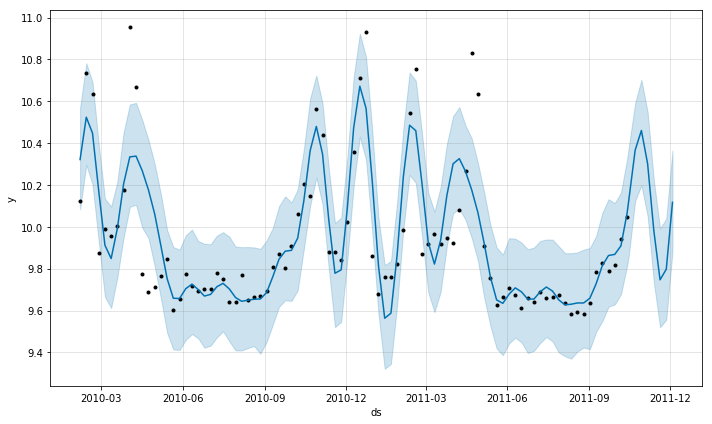

In [69]:
#값에 0이 있으면 log를 할 때 inf가 되므로 Initialization failed. 오류가 나니 주의할 것.
m = Prophet(yearly_seasonality=True)
m.fit(txsForMockForecastBayseian)
future = m.make_future_dataframe(periods=2*forecastDay, freq='w')
fcst=m.predict(future)
m.plot(fcst)

In [54]:
fcst

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2010-02-05,0.000000,9.973946,0.338424,0.338424,9.973946,9.973946,10.065041,10.562251,0.338424,0.338424,0.338424,0.338424,10.312370
1,2010-02-12,0.010417,9.973639,0.548676,0.548676,9.973639,9.973639,10.282238,10.773291,0.548676,0.548676,0.548676,0.548676,10.522315
2,2010-02-19,0.020833,9.973331,0.477184,0.477184,9.973331,9.973331,10.211224,10.693515,0.477184,0.477184,0.477184,0.477184,10.450514
3,2010-02-26,0.031250,9.973023,0.198996,0.198996,9.973023,9.973023,9.936460,10.410438,0.198996,0.198996,0.198996,0.198996,10.172019
4,2010-03-05,0.041667,9.972715,-0.065692,-0.065692,9.972715,9.972715,9.670182,10.132785,-0.065692,-0.065692,-0.065692,-0.065692,9.907023
5,2010-03-12,0.052083,9.972407,-0.128996,-0.128996,9.972407,9.972407,9.604622,10.082016,-0.128996,-0.128996,-0.128996,-0.128996,9.843411
6,2010-03-19,0.062500,9.972099,0.020068,0.020068,9.972099,9.972099,9.754573,10.235503,0.020068,0.020068,0.020068,0.020068,9.992167
7,2010-03-26,0.072917,9.971791,0.235231,0.235231,9.971791,9.971791,9.960018,10.450918,0.235231,0.235231,0.235231,0.235231,10.207022
8,2010-04-02,0.083333,9.971483,0.362985,0.362985,9.971483,9.971483,10.099919,10.583328,0.362985,0.362985,0.362985,0.362985,10.334468
9,2010-04-09,0.093750,9.971175,0.363421,0.363421,9.971175,9.971175,10.122435,10.588757,0.363421,0.363421,0.363421,0.363421,10.334596


In [47]:
fcst[-8:]

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
135,2012-09-07,1.000000,9.988931,-0.230246,-0.230246,9.988931,9.988931,9.508269,9.988774,-0.230246,-0.230246,-0.230246,-0.230246,9.758684
136,2012-09-09,1.002116,9.989103,-0.207750,-0.207750,9.989103,9.989103,9.544540,10.026241,-0.207750,-0.207750,-0.207750,-0.207750,9.781353
137,2012-09-16,1.009524,9.989707,-0.125523,-0.125523,9.989705,9.989710,9.633659,10.111153,-0.125523,-0.125523,-0.125523,-0.125523,9.864184
138,2012-09-23,1.016931,9.990311,-0.080425,-0.080425,9.990292,9.990335,9.667163,10.151160,-0.080425,-0.080425,-0.080425,-0.080425,9.909886
139,2012-09-30,1.024339,9.990915,-0.079179,-0.079179,9.990869,9.990967,9.673986,10.154771,-0.079179,-0.079179,-0.079179,-0.079179,9.911735
140,2012-10-07,1.031746,9.991518,-0.046439,-0.046439,9.991441,9.991603,9.705299,10.182179,-0.046439,-0.046439,-0.046439,-0.046439,9.945080
141,2012-10-14,1.039153,9.992122,0.098786,0.098786,9.992004,9.992241,9.856159,10.319617,0.098786,0.098786,0.098786,0.098786,10.090909
142,2012-10-21,1.046561,9.992726,0.323666,0.323666,9.992572,9.992886,10.084023,10.553770,0.323666,0.323666,0.323666,0.323666,10.316392


In [48]:
list(np.exp(fcst[-8:]['yhat']))

[17303.848009273333,
 17700.583113000415,
 19229.182403821651,
 20128.378559096491,
 20165.633227065409,
 20849.386213618429,
 24122.702773358149,
 30223.999777837529]

In [49]:
np.exp(fcst[135:]['yhat'])

135    17303.848009
136    17700.583113
137    19229.182404
138    20128.378559
139    20165.633227
140    20849.386214
141    24122.702773
142    30223.999778
Name: yhat, dtype: float64

In [55]:
def rmse(a,b):
    sum=0
    for i in range(len(a)):
        sum=sum+(a[i]-b[i])**2
    return np.sqrt(sum/len(a))


In [56]:
rmse([1,2,3],[4,5,6])

3.0

In [57]:
a='12'

In [61]:
if a == '12':
    print(1)